Numerical differentiation

In [ ]:
import numpy as np

def f(x):
    return np.exp(x/2)

def fprime(x):
    return np.exp(x/2)/2

h = 0.01
x = 0
dydx = (f(x+h)-f(x))/h

print(h, dydx, dydx - fprime(x))

0.01 0.501252085940096 0.0012520859400959594


n=17, h=7.62939453125e-06, Error=9.5367431640625e-07


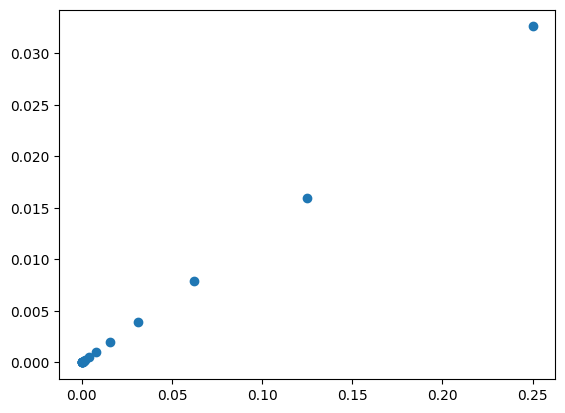

In [ ]:
import matplotlib.pyplot as plt

n = 1
x = 0
h = 2**-n
Error = 1
hs = []
errs = []
while Error >1e-6:
    n += 1
    h = 2**-n
    dydx = (f(x+h)-f(x))/h
    Error = np.abs(dydx - fprime(x))
    hs.append(h)
    errs.append(Error)

print(f'n={n}, h={h}, Error={Error}')

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(hs, errs)
plt.show()

Euler Method

In [ ]:
h = 0.4

x0 = 3
y0 = np.e

x1 = x0 + h
y1 = y0 + y0*np.log(y0) / x0 * h

x2 = x1 + h
y2 = y1 + y1*np.log(y1) / x1 * h

print(x0, x1, x2)
print(y0, y1, y2)

3 3.4 3.8
2.718281828459045 3.080719405586918 3.4885208089927504


differential eq dy/dx = y log y/x

solution = exp(x/3)

In [ ]:
import numpy as np
def dydx(x, y):
    return y * np.log(y)/x

def Euler(y, dydx, h):
    y = y + dydx * h
    return y

h = 0.4
x = 3
y = np.e
xys = [[x, y]]
while x<5:
    x = x + h
    y = Euler(y, dydx(x, y), h)
    xys.append([x, y])
xys = np.array(xys)

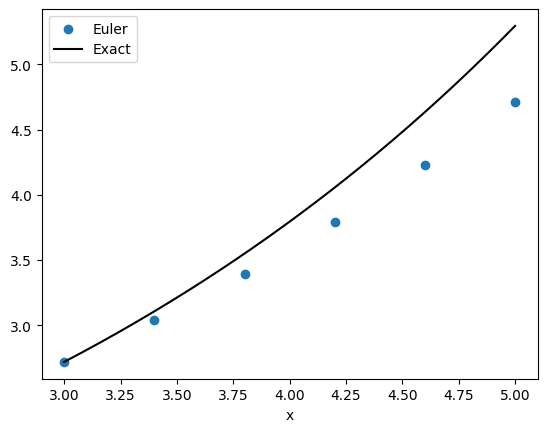

In [ ]:
def solution(x):
    return np.exp(x/3)

fig = plt.figure()
ax = fig.add_subplot()

x = xys[:,0]
Xd = np.linspace(np.min(x), np.max(x), 201)

ax.scatter(x, xys[:,1], label = 'Euler')
ax.plot(Xd, solution(Xd), label = 'Exact', color='black')
ax.set_xlabel('x')
plt.legend()
plt.show()

Damped harmonic oscillator

In [ ]:
def Euler(y, dydx, h):
    y = y + dydx * h
    return y

t0, z0, v0 = 0, 10, 0
h = 0.001
k = 0.1
gamma = 0.01

tzv = []
t, z, v = t0, z0, v0
for i in range(100000):
    t = t + h
    # z = z + v*h, v = v + (-k*z-gamma*v) * h
    z, v = Euler(z, v, h), Euler(v, -k * z - gamma * v, h)
    tzv.append([t, z, v])

tzv = np.array(tzv)

Visualization

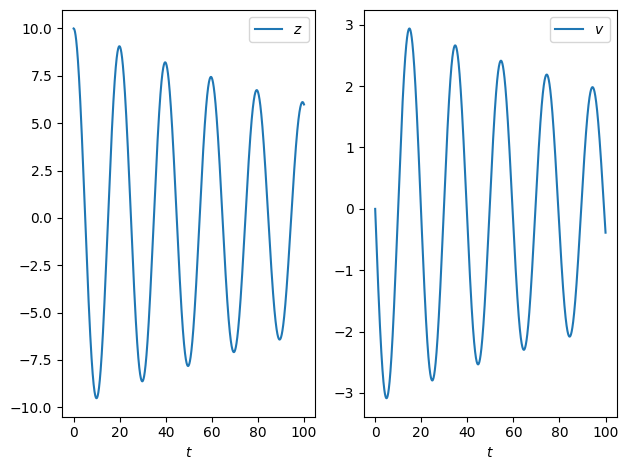

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ts, zs, vs = tzv.T
ax1.plot(ts, zs, label='$z$')
ax2.plot(ts, vs, label='$v$')
for ax in [ax1, ax2]:
    ax.legend()
    ax.set_xlabel("$t$")  # LaTeX
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np

def dydx(x, y):
    return y * np.log(y) / x

def Euler(x, y, dydx, h):
    y = y + h * dydx(x, y)
    return x + h, y

def RK2(x, y, dfunc, h):
    k1 = h * dfunc(x, y)
    k2 = h * dfunc(x + 0.5 * h, y + 0.5 * k1)
    return x + h, y + k2

def RK4(x, y, dfunc, h):
    k1 = h * dfunc(x, y)
    k2 = h * dfunc(x + 0.5 * h, y + 0.5 * k1)
    k3 = h * dfunc(x + 0.5 * h, y + 0.5 * k2)
    k4 = h * dfunc(x + h, y + k3)
    return x + h, y + (k1 + 2 * k2 + 2 * k3 + k4) / 6

h = 0.5
x0 = 3
x = x0
y = np.e

xy_E = [(x, y)]
xy_rk2 = [(x, y)]
xy_rk4 = [(x, y)]

while x < x0 + 0.5 * 5:
    xy_E.append(Euler(*xy_E[-1], dydx, h))
    xy_rk2.append(RK2(*xy_rk2[-1], dydx, h))
    xy_rk4.append(RK4(*xy_rk4[-1], dydx, h))
    x += h

xy_E = np.array(xy_E)
xy_rk2 = np.array(xy_rk2)
xy_rk4 = np.array(xy_rk4)
print(xy_E)
print(xy_rk2)
print(xy_rk4)

[[3.         2.71828183]
 [3.5        3.1713288 ]
 [4.         3.69421327]
 [4.5        4.29764805]
 [5.         4.99389946]
 [5.5        5.7970269 ]]
[[3.         2.71828183]
 [3.5        3.20759191]
 [4.         3.78460616]
 [4.5        4.46503659]
 [5.         5.26740241]
 [5.5        6.21353254]]
[[3.         2.71828183]
 [3.5        3.21124527]
 [4.         3.79361007]
 [4.5        4.48158902]
 [5.         5.29433527]
 [5.5        6.2544755 ]]


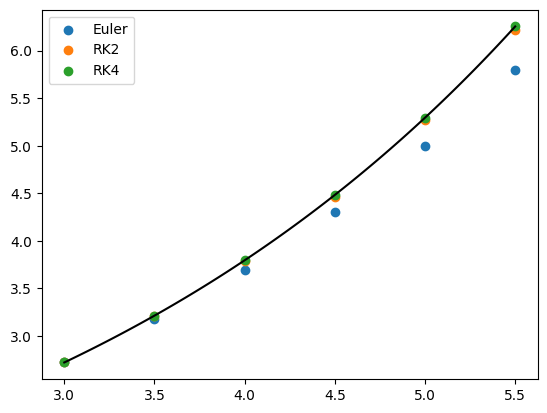

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()

X = np.linspace(3, 5.5, 101)
ax.plot(X, np.exp(X/3), color = 'k')

for xy, lab in zip((xy_E, xy_rk2, xy_rk4), ['Euler', 'RK2', 'RK4']):
    ax.scatter(xy[:,0], xy[:,1], label=lab)

ax.legend()
plt.show()

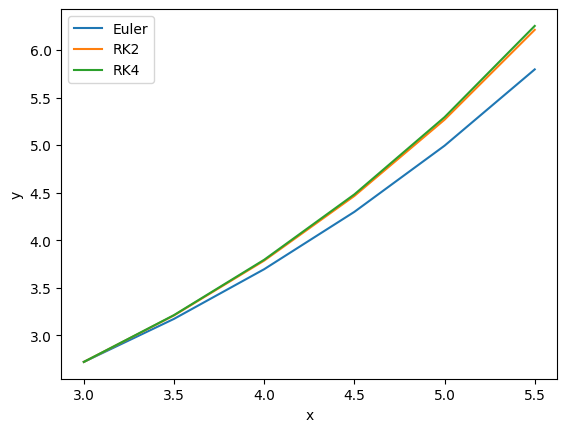

In [ ]:
plt.figure()
plt.plot(xy_E[:,0], xy_E[:,1], label='Euler')
plt.plot(xy_rk2[:,0], xy_rk2[:,1], label='RK2')
plt.plot(xy_rk4[:,0], xy_rk4[:,1], label='RK4')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()